# Names and ID

Osama Osman - 201909415


# Project due by `2pm on Thursday 2/5/2024`

# Introduction

# Predicting

# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




data = pd.read_csv('used_cars_data.csv')


# **1 - Data Exploration**

In [6]:
# Load the dataset
data = pd.read_csv('used_cars_data.csv')
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [7]:
# Drop the 'S.No.' column
data.drop('S.No.', axis=1, inplace=True)

# Define functions to extract numeric values from strings
def extract_mileage(value):
    """Extract numeric mileage value from the string."""
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError):
        return None

def extract_engine(value):
    """Extract integer engine CC value from the string."""
    try:
        return int(value.split()[0])
    except (ValueError, AttributeError):
        return None

def extract_power(value):
    """Extract float power value from the string."""
    try:
        return float(value.split()[0])
    except (ValueError, AttributeError):
        return None

def extract_new_price(value):
    """Extract float new price value from the string, assuming 'Lakh' is part of the string."""
    try:
        if 'Lakh' in value:
            return float(value.split()[0])
        return None
    except (ValueError, AttributeError):
        return None

# Apply functions to clean and convert the data
data['Mileage'] = data['Mileage'].apply(extract_mileage)
data['Engine'] = data['Engine'].apply(extract_engine)
data['Power'] = data['Power'].apply(extract_power)
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')  # Convert 'Seats' directly to numeric, handling non-numeric issues



# Display the first few rows of the cleaned dataset
print(data.head())


                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4     

- Preprocess the dataset by encoding the categorical variables using the `LabelEncoder` for the target variable and the `OneHotEncoder` for the features.

In [8]:
def extract_numeric(value):
    try:
        return float(value.split()[0])
    except:
        return None

# Apply the extraction function to the relevant columns
data['Mileage'] = data['Mileage'].apply(extract_numeric)
data['Engine'] = data['Engine'].apply(extract_numeric)
data['Power'] = data['Power'].apply(extract_numeric)
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce')
if 'New_Price' in data.columns:
    data['New_Price'] = data['New_Price'].apply(lambda x: float(x.split()[0]) if isinstance(x, str) and 'Lakh' in x else None)

# Encode target variable 'Price' using LabelEncoder
label_encoder = LabelEncoder()
data['Price'] = label_encoder.fit_transform(data['Price'])

# Define the features to encode with OneHotEncoder
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Pass through other columns unchanged
)

# Apply the ColumnTransformer to the DataFrame
data_encoded = column_transformer.fit_transform(data)

# Convert the resulting array back to a DataFrame with appropriate column names
columns = column_transformer.get_feature_names_out()
data_encoded = pd.DataFrame(data_encoded, columns=columns)

# Display the first few rows of the preprocessed dataset
print(data_encoded.head())


  cat__Location_Ahmedabad cat__Location_Bangalore cat__Location_Chennai  \
0                     0.0                     0.0                   0.0   
1                     0.0                     0.0                   0.0   
2                     0.0                     0.0                   1.0   
3                     0.0                     0.0                   1.0   
4                     0.0                     0.0                   0.0   

  cat__Location_Coimbatore cat__Location_Delhi cat__Location_Hyderabad  \
0                      0.0                 0.0                     0.0   
1                      0.0                 0.0                     0.0   
2                      0.0                 0.0                     0.0   
3                      0.0                 0.0                     0.0   
4                      1.0                 0.0                     0.0   

  cat__Location_Jaipur cat__Location_Kochi cat__Location_Kolkata  \
0                  0.0              

In [9]:
# Check the shape of the dataset
data.shape

(7253, 13)

In [10]:
# Check for data types
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                  int64
dtype: object

In [11]:
# Display the information about the data, such as the number of rows and columns, data types, and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            0 non-null      object 
 8   Engine             0 non-null      object 
 9   Power              0 non-null      object 
 10  Seats              7200 non-null   float64
 11  New_Price          986 non-null    float64
 12  Price              7253 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [12]:
# Display summary statistics
data.describe()

,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7.253000e+03,7200.000000,986.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,20.268124,623.526127
std,3.254421,8.442772e+04,0.811660,19.837365,466.080308
min,1996.000000,1.710000e+02,0.000000,3.910000,0.000000
25%,2011.000000,3.400000e+04,5.000000,7.870000,220.000000
50%,2014.000000,5.341600e+04,5.000000,11.470000,469.000000
75%,2016.000000,7.300000e+04,5.000000,24.010000,1046.000000
max,2019.000000,6.500000e+06,10.000000,99.920000,1373.000000


In [13]:
data.describe(include=["O"])

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,0,0,0
unique,2041,11,5,2,4,0,0,0
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,NaN,NaN,NaN
freq,55,949,3852,5204,5952,NaN,NaN,NaN


In [15]:
# Frequency counts for categorical variables
data['Transmission'].value_counts()


Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

In [16]:
# Frequency counts for categorical variables
data['Owner_Type'].value_counts()

Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

In [17]:
# Frequency counts for categorical variables
data['Kilometers_Driven'].value_counts()

Kilometers_Driven
60000    96
65000    86
45000    86
70000    77
50000    72
         ..
87200     1
48324     1
20773     1
66355     1
72443     1
Name: count, Length: 3660, dtype: int64

In [18]:
# Frequency counts for categorical variables
data['Location'].value_counts()

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

In [19]:
# Frequency counts for categorical variables
data['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64

In [ ]:
# Check for missing values


Training Accuracy (R^2): 0.21
Testing Accuracy (R^2): 0.20
Mean Squared Error on Test set: 176607.1884748835


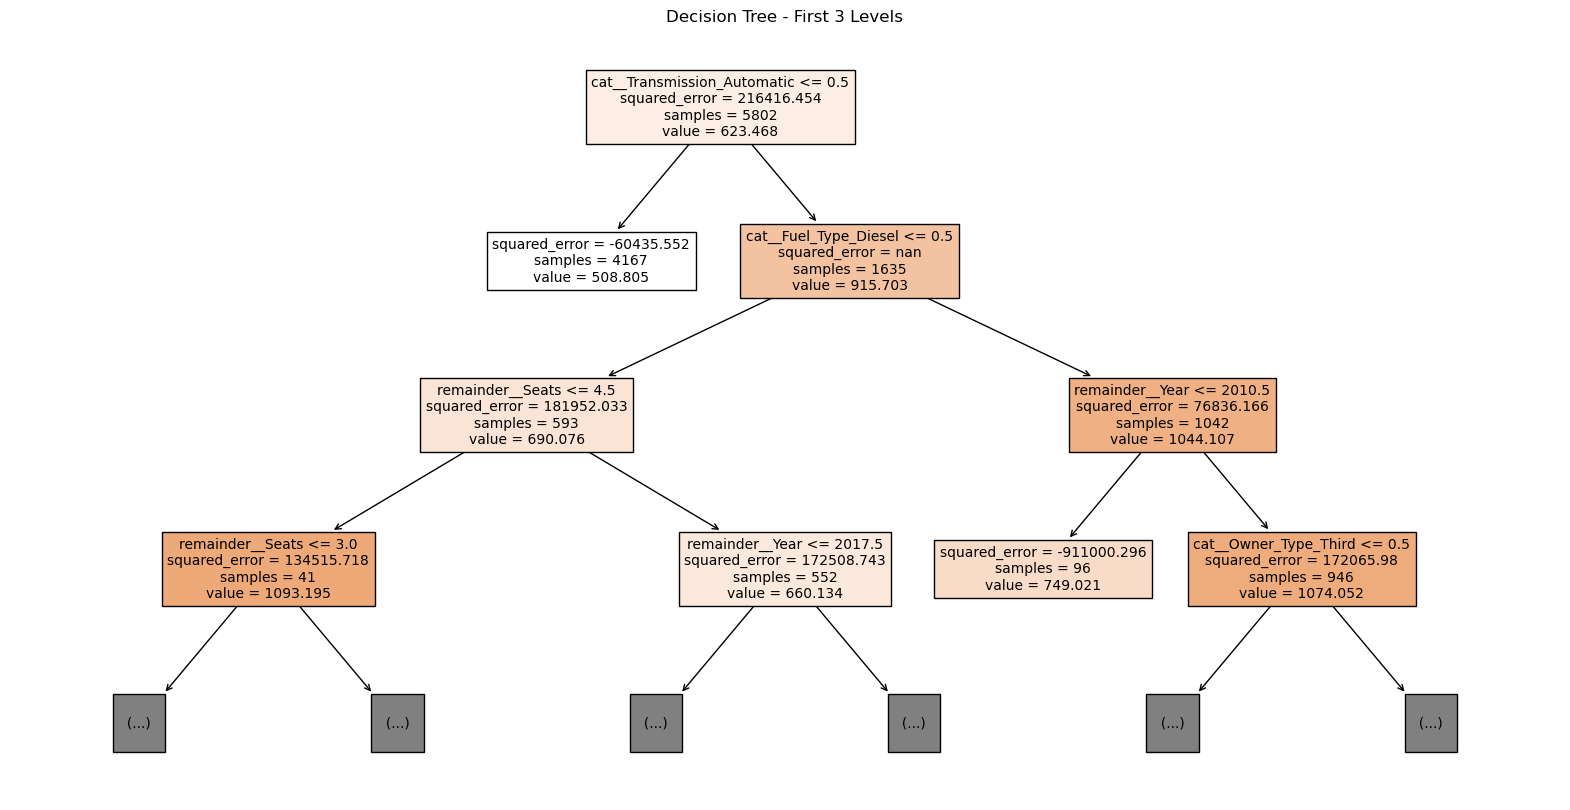

In [4]:
# Exclude non-numeric columns and the target column
X = data_encoded.drop(['remainder__Name', 'remainder__Price'], axis=1)
y = data_encoded['remainder__Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Evaluate the model using R^2 score
training_r2 = r2_score(y_train, y_train_pred)
testing_r2 = r2_score(y_test, y_test_pred)

# Calculate Mean Squared Error for testing data
mse = mean_squared_error(y_test, y_test_pred)

# Print performance metrics
print(f"Training Accuracy (R^2): {training_r2:.2f}")
print(f"Testing Accuracy (R^2): {testing_r2:.2f}")
print(f"Mean Squared Error on Test set: {mse}")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.title('Decision Tree - First 3 Levels')
plt.show()


In [5]:
#this is just for testing
print(X_train.columns)  # This will show all the column names in X_train


Index(['cat__Location_Ahmedabad', 'cat__Location_Bangalore',
       'cat__Location_Chennai', 'cat__Location_Coimbatore',
       'cat__Location_Delhi', 'cat__Location_Hyderabad',
       'cat__Location_Jaipur', 'cat__Location_Kochi', 'cat__Location_Kolkata',
       'cat__Location_Mumbai', 'cat__Location_Pune', 'cat__Fuel_Type_CNG',
       'cat__Fuel_Type_Diesel', 'cat__Fuel_Type_Electric',
       'cat__Fuel_Type_LPG', 'cat__Fuel_Type_Petrol',
       'cat__Transmission_Automatic', 'cat__Transmission_Manual',
       'cat__Owner_Type_First', 'cat__Owner_Type_Fourth & Above',
       'cat__Owner_Type_Second', 'cat__Owner_Type_Third', 'remainder__Year',
       'remainder__Kilometers_Driven', 'remainder__Mileage',
       'remainder__Engine', 'remainder__Power', 'remainder__Seats',
       'remainder__New_Price'],
      dtype='object')
